In [3]:
import numpy as np
import pandas as pd

In [8]:
df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
print('Data downloaded and read into a dataframe!')
df_can.head()
print(df_can.shape)

Data downloaded and read into a dataframe!
(195, 43)


In [13]:
# Drop column
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head()

KeyError: "['AREA', 'REG', 'DEV', 'Type', 'Coverage'] not found in axis"

In [22]:
df_can.head()
#rename
df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
# Kiểm tra xem có phải tất cả các nhãn cột có phải là string hay k
all(isinstance(column, str) for column in df_can.columns)
# Chuyển các nhãn về string
df_can.columns = list(map(str, df_can.columns))
df_can['2008']
# Đặt tên quốc gia làm chỉ mục, .loc để dễ truy cập
df_can.set_index('Country', inplace=True)

KeyError: "None of ['Country'] are in the columns"

In [41]:
df_can.loc[['Albania']]
df_can.head()
#Têm cột total, không lấy các cột chữ 
df_can['Total'] = df_can.iloc[:,3:].sum(axis=1)
print(df_can.shape)

(195, 38)


In [45]:
#tạo year để dễ truy cập sau này 
years = list(map(str, range(1980, 2014)))
years
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.style.use('ggplot')
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.9.2


In [50]:
# sắp xếp giảm dần theo total 
df_can.sort_values(by='Total', ascending=False, inplace=True)
df_can.head()
# top 5
df_top5 = df_can.head()
# chuyển vị
df_top5 = df_top5[years].transpose()

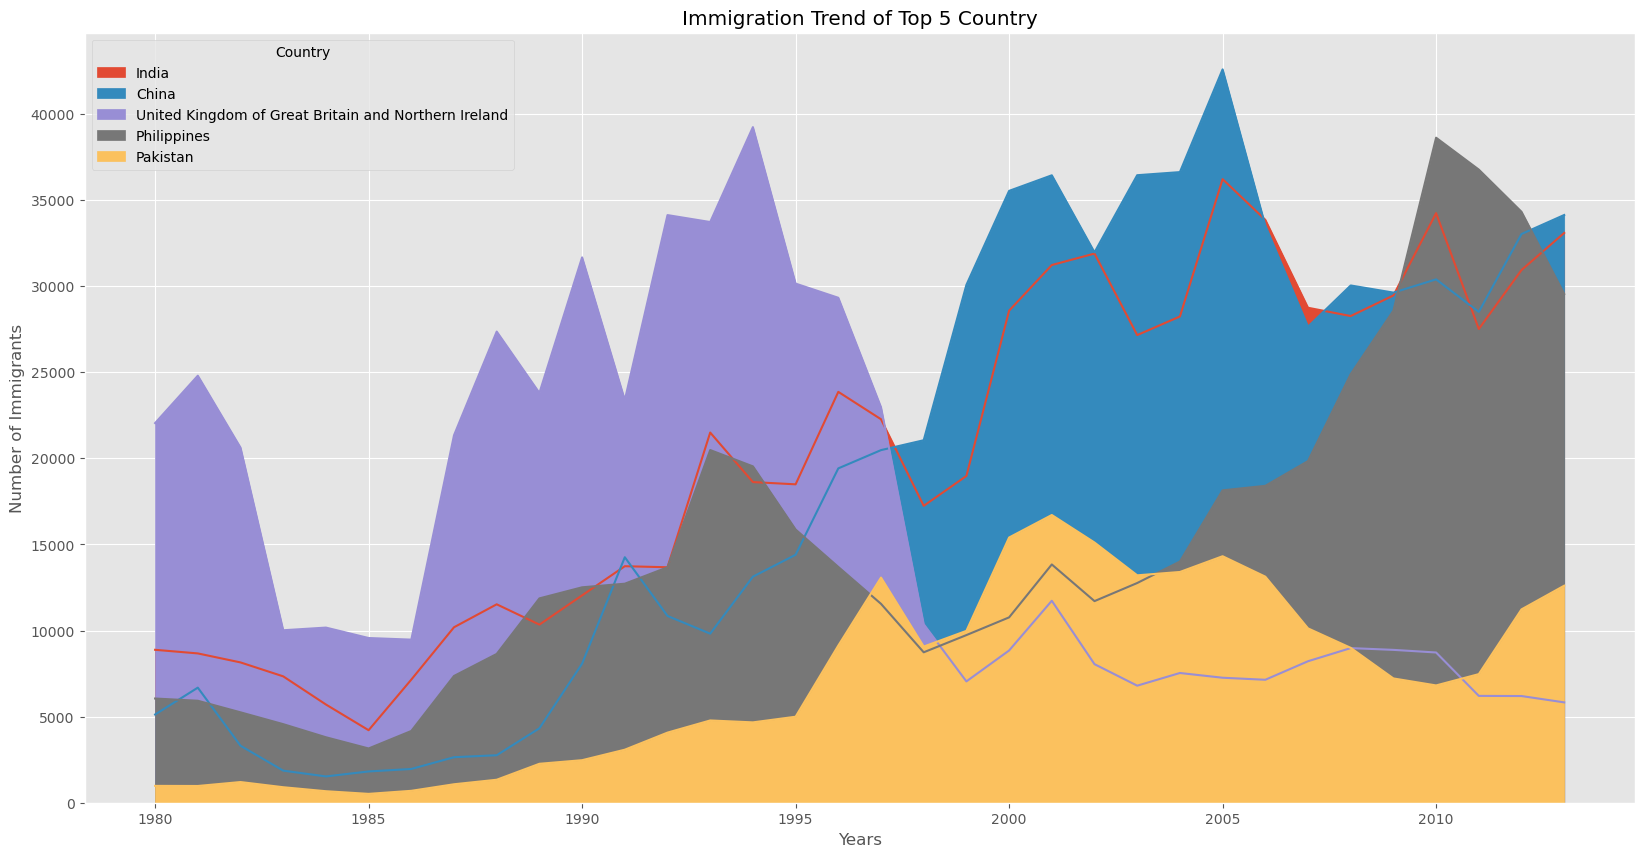

In [60]:
df_top5.head()
# đổi chỉ mục thành int để vẽ 
df_top5.index = df_top5.index.map(int)
#  biểu đồ xếp chồng 
# dùng phương thức plot có sẵn của pandas để vẽ
# figsize đặt chiều cao theo x và y. (20,10) x: 20 inches, y: 10 inches
df_top5.plot(kind='area', stacked=False,alpha=1, figsize=(20,10))
plt.title('Immigration Trend of Top 5 Country')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()
#alpha(độ mờ) mặc định: 0,5(trung bình) [0:1]

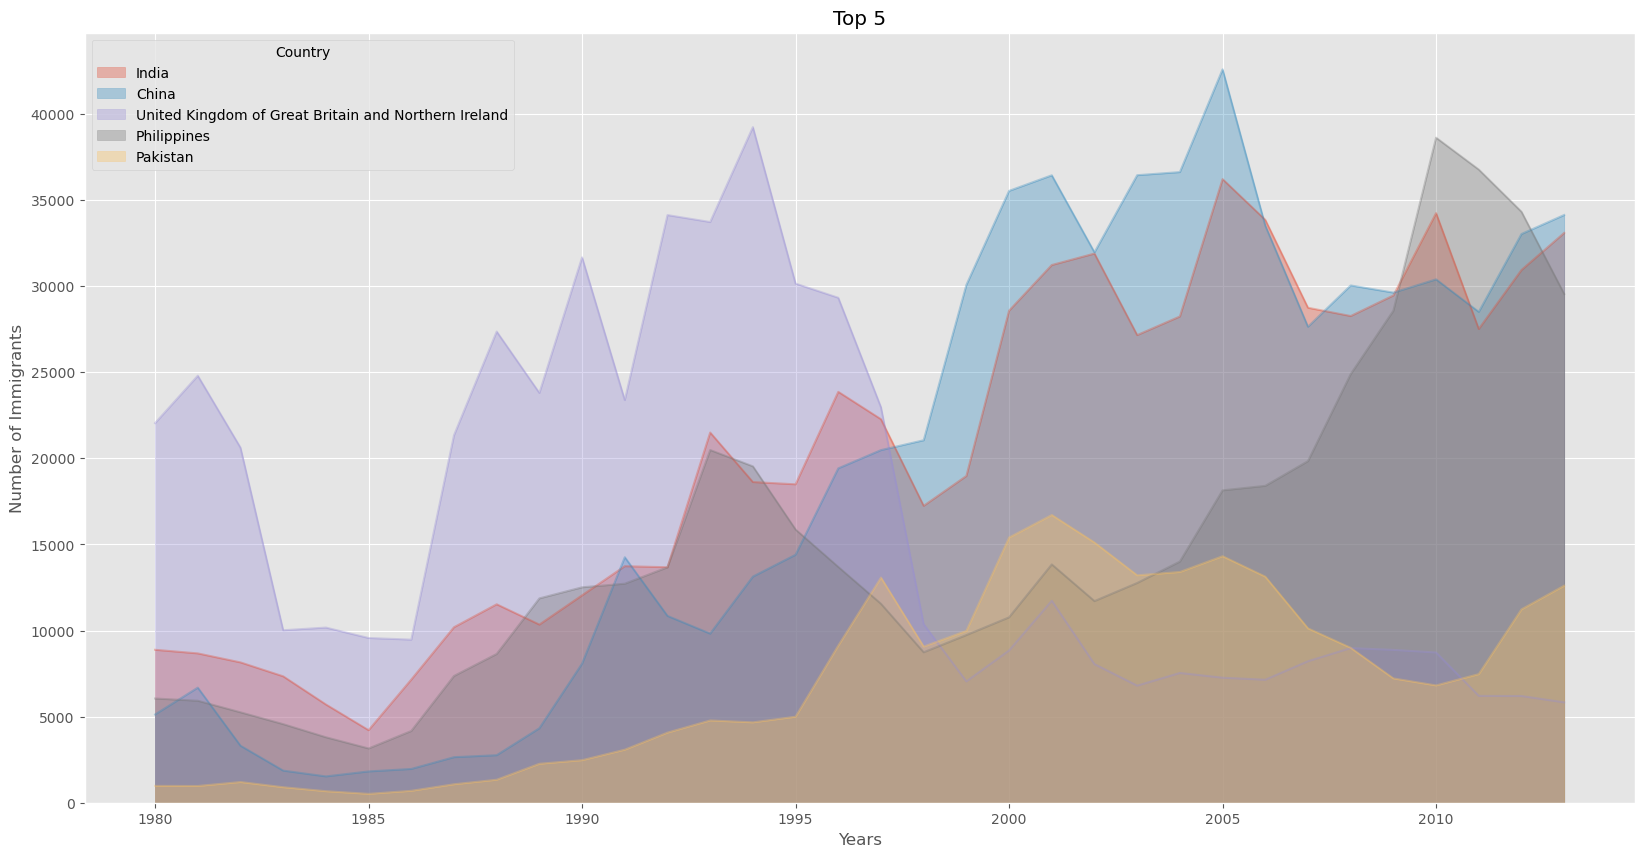

In [66]:
# plt lớp scripting
# axes lớp artist(ưu tiên)
ax = df_top5.plot(kind='area', stacked=False, alpha=0.35, figsize=(20,10))
ax.set_title('Top 5')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
plt.show()

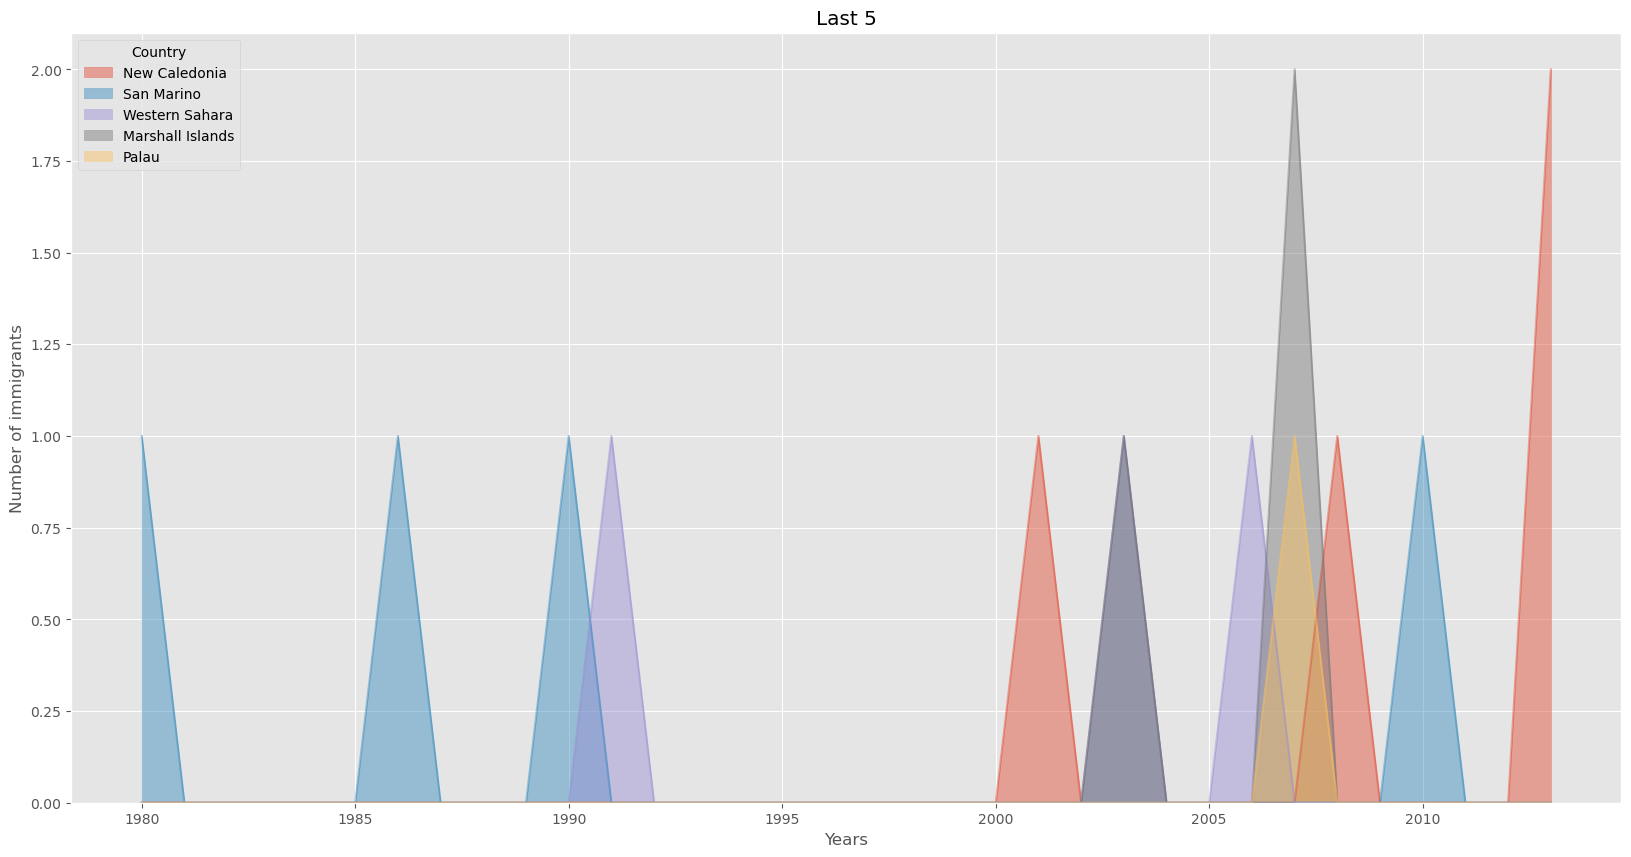

In [68]:
# top 5 cuoi
df_last5 = df_can.tail(5)
# chuyển vị 
df_last5  = df_last5[years].transpose()
# index => int
df_last5.index = df_last5.index.map(int)
# vẽ
df_last5.plot(kind='area', stacked=False, alpha=0.45, figsize=(20,10))
plt.title('Last 5')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()


In [ ]:
# Sử dụng artist
df_last5a = df_can.tail(5)
df_last5a = df_last5a[years].transpose()
df_last5a.index = df_last5a.index.map(int)

ax = df_last5a.plot(kind='area', stacked=False, alpha=0.55, figsize=(20,10))
ax.set_title('Least 5 Country')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')
plt.show()


[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


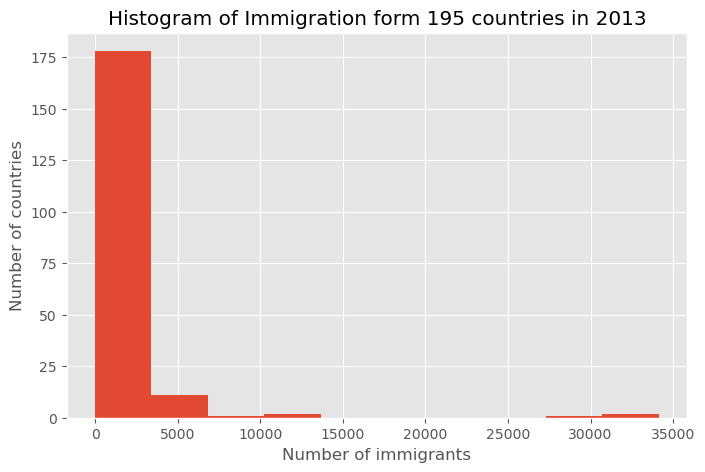

In [77]:
#Biểu đồ tần suất (histogram)
#chia trục x thành mỗi 1 khoảng bin, 1 bin chứ thông tin xuất hiện của bin đó
count, bin_edges = np.histogram(df_can['2013'])
print(count)
print(bin_edges)
# vẽ 
df_can['2013'].plot(kind='hist', figsize=(8,5))
plt.title('Histogram of Immigration form 195 countries in 2013')
plt.ylabel('Number of countries')
plt.xlabel('Number of immigrants')
plt.show()


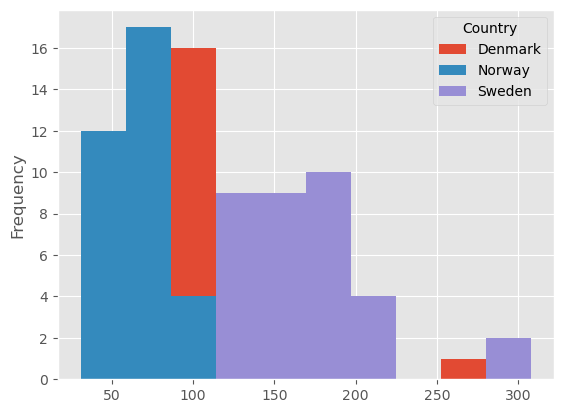

In [84]:
# Tiếp tục với dữ liệu của 3 quốc gia
# df_can.loc[['Denmark','Norway','Sweden'], years].plot.hist()
# vẽ biểu đồ cho years
df_t = df_can.loc[['Denmark','Norway', 'Sweden'], years].transpose()
df_t.plot.hist()
plt.show()

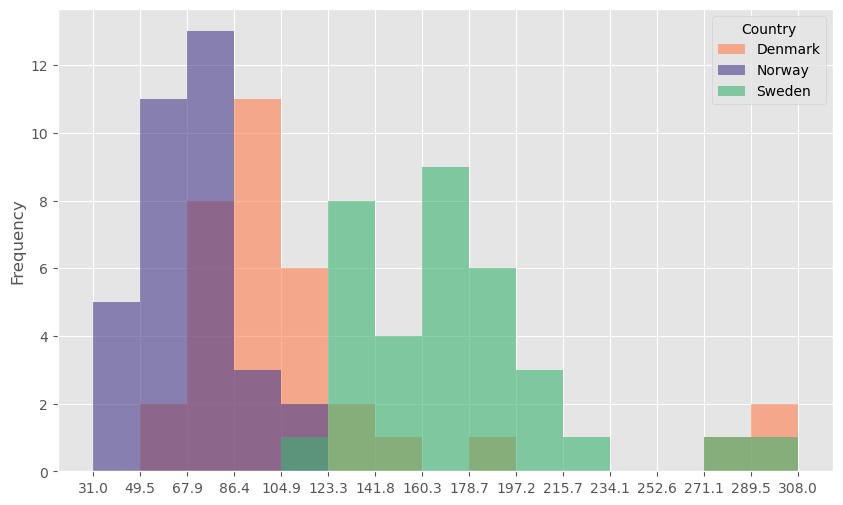

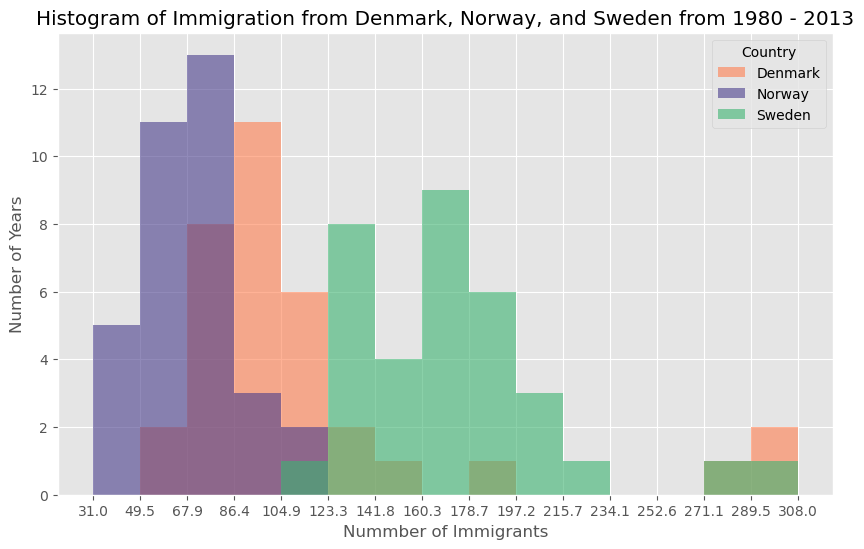

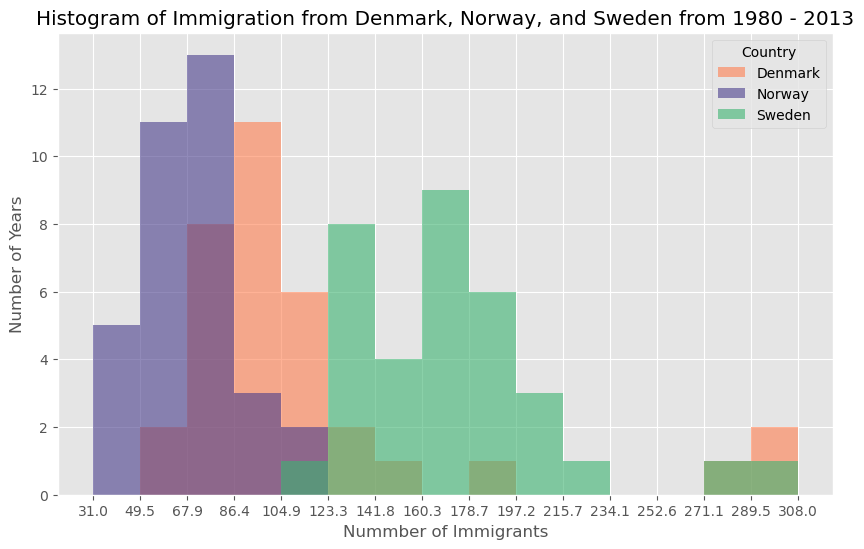

In [87]:
# style lại
# lấy x-tick(giá trị bin thay thế)
count, bin_edges = np.histogram(df_t, 15)
#draw
# bins = 15, alpha=0,6 xticks=bin_edges
df_t.plot(kind='hist', figsize=(10,6), bins=15, alpha=0.6, xticks=bin_edges, color=['coral','darkslateblue','mediumseagreen'])
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Nummber of Immigrants')
plt.show()

In [90]:
# danh sách màu 
for name, hex in mpl.colors.cnames.items():
  print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


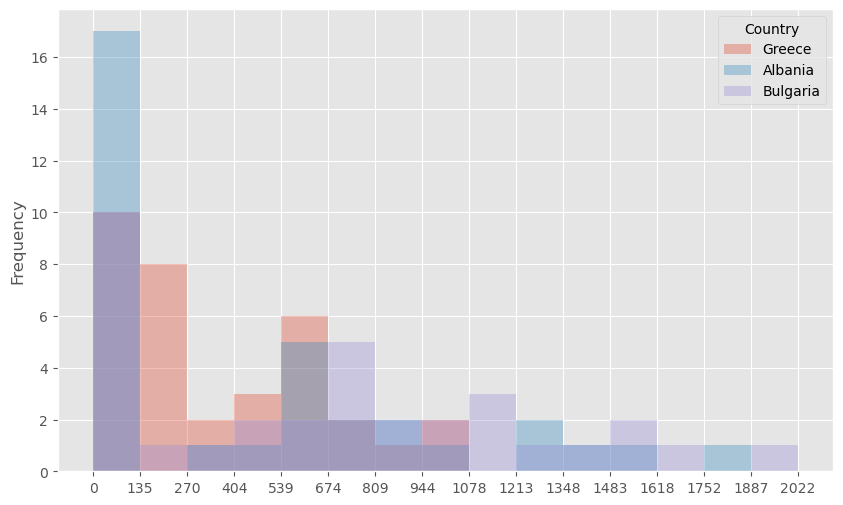

In [93]:
df_show = df_can.loc[['Greece','Albania','Bulgaria'], years].transpose()
df_show.index = df_show.index.map(int)
count, bin_edges = np.histogram(df_show, 15)
df_show.plot(kind='hist', bins=15, alpha=0.35, xticks=bin_edges, figsize=(10,6))
plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.xlabel('Number of Immigrations')
plt.ylabel('Number of Years')
plt.show()

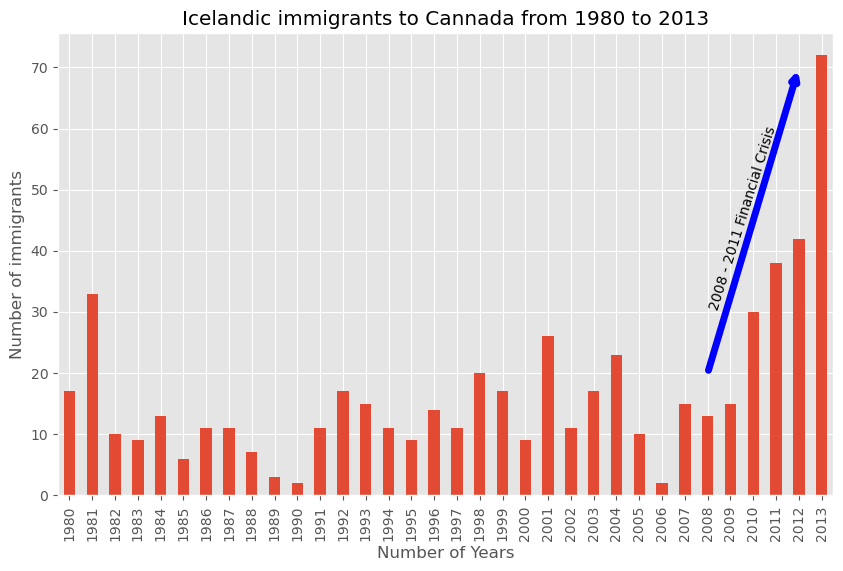

In [113]:
# Biểu đồ cột
# bar -> cột đứng, barh -> cột ngang 
# Biểu đồ cột Ice land
df_iceland = df_can.loc['Iceland', years]
#rot=90 xoay nhãn trục x 90 độ(hiển thị label)
df_iceland.plot(kind='bar', figsize=(10,6), rot=90)

plt.xlabel('Number of Years')
plt.ylabel('Number of immigrants')
plt.title('Icelandic immigrants to Cannada from 1980 to 2013')
# thêm mũi tên
# xy đầu mũi tên
# xytext, đuôi mũi tên
# xycoords: tạo độ điểm đc chú thích
# arrowprops:
# arrowstyle=->; connectionstyle='arc3'(đường mũi tên); color='blue', lw=2 chiều rộng mũi tên
plt.annotate('', xy=(32,70), xytext=(28,20), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=5))
# xoay văn bản
plt.annotate('2008 - 2011 Financial Crisis', 
             xy=(28, 30),     
             #góc xoay         
             rotation=72.5,  
            # chỉnh văn bản theo chiểu dọc
             
             va='bottom',                
             # căn lề ngang 
             ha='left', 
            )
plt.show()

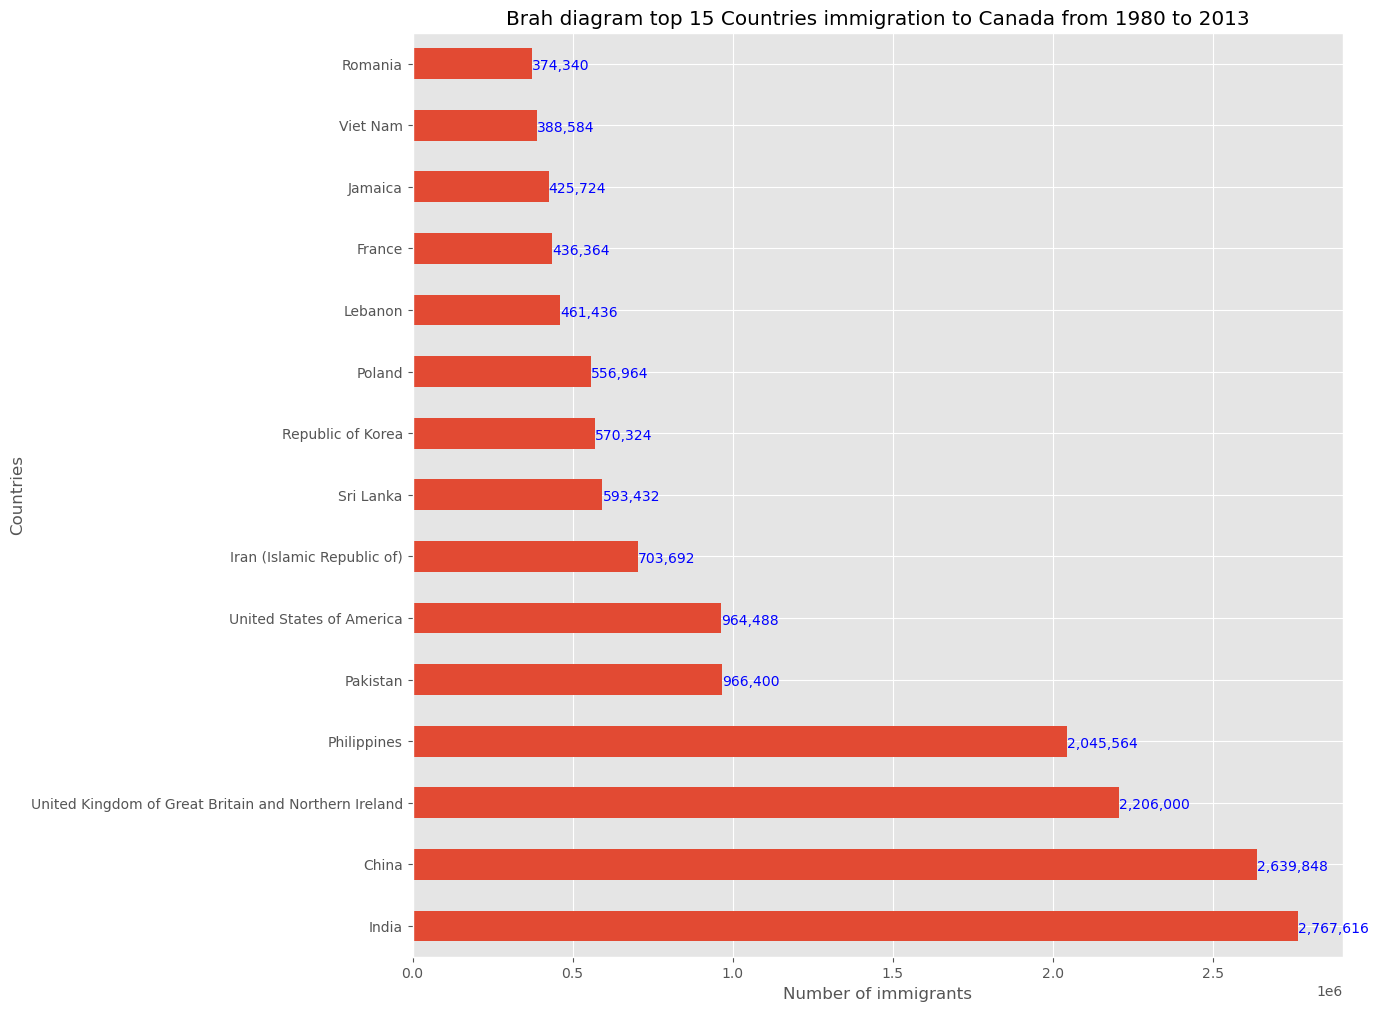

In [ ]:
#Quiz
df_can.sort_values(by='Total', ascending=False, inplace=True)
#Top 15 chỉ có 1 cột total
df_top15 = df_can['Total'].head(15)
years = list(map(str, range(1980, 2014)))

#draw
df_top15.plot(kind='barh', figsize=(12,12))
plt.title('Brah diagram top 15 Countries immigration to Canada from 1980 to 2013')
plt.xlabel('Number of immigrants')
# Mặc định sẽ vẽ theo index, chính là tên các quốc gia
plt.ylabel('Countries')

for index, value in enumerate(df_top15):
  label = format(value, ',')
  plt.annotate(label, xy=(int(value), index- 0.10), color='blue')

plt.show()
 